# **Visual Information Processing Lab**

#### Imports

In [14]:
import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Data Fetching and Visualizattion

In [15]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

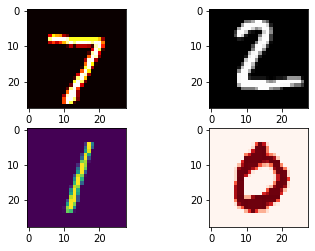

In [16]:
plt.subplot(221).imshow(xtest[0],cmap='hot')
plt.subplot(222).imshow(xtest[1],cmap='gray')
plt.subplot(223).imshow(xtest[2],cmap='viridis')
plt.subplot(224).imshow(xtest[3],cmap='Reds')

In [17]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#### Data Pre Processing
* Normalization
* One Hot Encoding

In [18]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

In [19]:
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std
xtest -= mean
xtest /= std

255.0 255.0
0.0 0.0
9 9
0 0
33.318447
78.567444


In [20]:
xtrain = xtrain.reshape(xtrain.shape[0],784)
xtest  = xtest.reshape(xtest.shape[0],784)
print(xtrain.shape)
print(xtest.shape)

(60000, 784)
(10000, 784)


In [21]:
from tensorflow.keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

print(ytrain.shape)
print(ytest.shape)

(60000, 10)
(10000, 10)


#### MLP Model
* Model building
* Compiling
* Training

Epoch 1/5
240/240 [==============================] - 3s 13ms/step - loss: 1.4717 - accuracy: 0.6509 - val_loss: 0.9430 - val_accuracy: 0.8324
Epoch 2/5
240/240 [==============================] - 3s 13ms/step - loss: 0.8112 - accuracy: 0.8330 - val_loss: 0.6535 - val_accuracy: 0.8638
Epoch 3/5
240/240 [==============================] - 3s 13ms/step - loss: 0.6281 - accuracy: 0.8573 - val_loss: 0.5389 - val_accuracy: 0.8772
Epoch 4/5
240/240 [==============================] - 3s 12ms/step - loss: 0.5416 - accuracy: 0.8689 - val_loss: 0.4771 - val_accuracy: 0.8845
Epoch 5/5
240/240 [==============================] - 3s 12ms/step - loss: 0.4904 - accuracy: 0.8762 - val_loss: 0.4383 - val_accuracy: 0.8900

Epoch 1/5
240/240 [==============================] - 4s 13ms/step - loss: 0.7366 - accuracy: 0.7951 - val_loss: 0.4109 - val_accuracy: 0.8911
Epoch 2/5
240/240 [==============================] - 3s 13ms/step - loss: 0.3898 - accuracy: 0.8926 - val_loss: 0.3374 - val_accuracy: 0.9061
Epoch

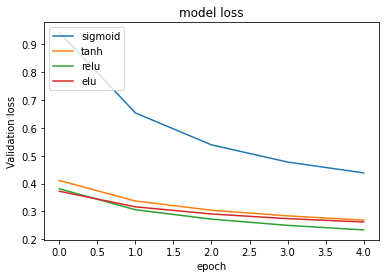

In [22]:
import keras
from keras import models
from keras import layers

epochs = 5

for activation in ['sigmoid', 'tanh', 'relu','elu']:
    model = models.Sequential()
    model.add(layers.Dense(512, activation=activation, input_shape=(784,)))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
    history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=200,epochs=5, verbose=1)
    print("")
    
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('Validation loss')
    plt.xlabel('epoch')
    plt.legend([ 'sigmoid', 'tanh', 'relu','elu'], loc='upper left')